# Machine Learning Engineer Nanodegree Program 

### Capstone Project : Object Detection, Classification and Recognition of Corvette Generations

#### By: Joel Haas
#### October 2019

## Predictions

In this iPython notebook, I perform multiple ways to make and view the predictions.  For example, I make predictions one a time, in batches, and by generating a confusion matrix.



### Import Python Libraries 

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

from keras.preprocessing import image
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

from keras.callbacks import ModelCheckpoint

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Import Training Data

In [2]:
# path to the project folder
path = r"D:\D Drive\DataScience\MachineLearningEngineerNanodegree\capstoneProject\\"

# ingest subset of training data
#train = pd.read_csv(path + '/labels_training_data.csv')

# ingest full set of training data
test = pd.read_csv(path + 'labels/labels_test_data.csv')

In [3]:
# view training data
test.head()

,id,car,corvette,c1,c2,c3,c4,c5,c6,c7,c8,classification
0,cars_1_0_0_ (44).jpg,1,0,0,0,0,0,0,0,0,0,"['car', 'not_corvette']"
1,cars_1_0_0_ (45).jpg,1,0,0,0,0,0,0,0,0,0,"['car', 'not_corvette']"
2,cars_1_0_0_ (46).jpg,1,0,0,0,0,0,0,0,0,0,"['car', 'not_corvette']"
3,cars_1_0_0_ (47).jpg,1,0,0,0,0,0,0,0,0,0,"['car', 'not_corvette']"
4,cars_1_0_0_ (48).jpg,1,0,0,0,0,0,0,0,0,0,"['car', 'not_corvette']"


In [4]:
# shape of the training data
test.shape

(486, 12)

## Load and Pre-Process the Images 

We need to read in each image and pre-process it for our neural network.  The output is an array where each image is the same size and with pixel values between 0 and 1.   

In [5]:
### Function to Load and Pre-Process the Images ###
def preprocess(data, sub_dir):
    """Input: dataframe with image IDs and the one hot encoded classifications
       Output: a numpy array with all the images pre-processed"""
    
    train_image = []
    for i in tqdm(range(data.shape[0])):
        try:
            # load each image and resize
            img = image.load_img(sub_dir + data['id'][i], target_size=(400,400,3))
            
            # convert image to an array
            img = image.img_to_array(img)
            
            # divide image by 255 so values are between 0 and 1 
            img = img/255
            
            # add the processed image to a list
            train_image.append(img)
        except:
            print(i)
    
    # convert the list of preprocessed images to a numpy array
    X = np.array(train_image)
    
    return X


In [6]:
# directory with the subset of images for training
#sub_dir_train = r'images/dataSet_training//'

# directory with the full set of images for training
sub_dir_test = path + r'images/testSet//'

# Input to function: dataframe with image IDs and the location of the folder
# Output is a numpy array with all the images pre-processed
X = preprocess(test, sub_dir_test)

100%|████████████████████████████████████████████████████████████████████████████████| 486/486 [00:10<00:00, 44.68it/s]


In [7]:
# view shape of the preprocessed images we will use for training
X.shape

(486, 400, 400, 3)

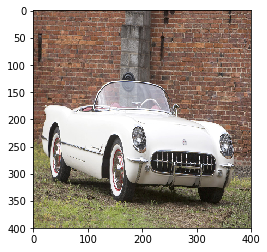

In [8]:
# view one of the images
plt.imshow(X[74])

In [9]:
from keras.models import load_model

In [10]:
# one hot encode the classification labels
true_labels_test = pd.get_dummies(test['classification'])
true_labels_test.head()

,"['car', 'corvette', 'c1']","['car', 'corvette', 'c2']","['car', 'corvette', 'c3']","['car', 'corvette', 'c4']","['car', 'corvette', 'c5']","['car', 'corvette', 'c6']","['car', 'corvette', 'c7']","['car', 'corvette', 'c8']","['car', 'not_corvette']","['not_car', 'not_corvette']"
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0


In [11]:
from keras.models import Model
from keras import applications
from keras.layers import Input

## Load Compiled Models for Prediction

In [12]:
# load the compiled model
model_VGG16 = load_model('VGG16_model_AWS.h5')
model_ResNet50 = load_model('Resnet50_model_AWS.h5')

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


### Perform Predictions and Print to Screen for Manual Evaluation

Determine the prediction and the true label and print to screen for manual inspection of how the algorithm is performing.

In [169]:
w=0
r=1

for i in range(len(X)):
    #prediction = model_VGG16.predict(np.expand_dims(X[i], axis=0))
    prediction = model_ResNet50.predict(np.expand_dims(X[i], axis=0))
    result = np.argsort(prediction[0])[:-2:-1]
    predicted_classification_index = result[0]
    
    # prediction
    predicted_classification = true_labels_test.columns[predicted_classification_index].strip('][').split(', ')   
    predict2 = "".join(predicted_classification)
    predict2 = predict2.replace("'","")
    #print(predict2)

    # true label
    true_label = test['classification'][i].strip('][').split(', ') 
    true1 = "".join(true_label)
    true1 = true1.replace("'","")
    #print(true1)
    
    # compare
    if predict2 == true1:
        print("CORRECT!  " "predicted: ", predict2, "   TRUE label: ", true1)
        r+=1
    else:
        print("wrong:  ", "PREDICTED: ", predict2, "   TRUE label: ", true1)
        w+=1

print("r:", r, "   w:", w, "   accuracy: ", r/(len(X)*100)


CORRECT!  predicted:  carnot_corvette    TRUE label:  carnot_corvette
CORRECT!  predicted:  carnot_corvette    TRUE label:  carnot_corvette
CORRECT!  predicted:  carnot_corvette    TRUE label:  carnot_corvette
CORRECT!  predicted:  carnot_corvette    TRUE label:  carnot_corvette
CORRECT!  predicted:  carnot_corvette    TRUE label:  carnot_corvette
CORRECT!  predicted:  carnot_corvette    TRUE label:  carnot_corvette
CORRECT!  predicted:  carnot_corvette    TRUE label:  carnot_corvette
CORRECT!  predicted:  carnot_corvette    TRUE label:  carnot_corvette
CORRECT!  predicted:  carnot_corvette    TRUE label:  carnot_corvette
CORRECT!  predicted:  carnot_corvette    TRUE label:  carnot_corvette
CORRECT!  predicted:  carnot_corvette    TRUE label:  carnot_corvette
CORRECT!  predicted:  carnot_corvette    TRUE label:  carnot_corvette
CORRECT!  predicted:  carnot_corvette    TRUE label:  carnot_corvette
CORRECT!  predicted:  carnot_corvette    TRUE label:  carnot_corvette
CORRECT!  predicted:

CORRECT!  predicted:  carcorvettec4    TRUE label:  carcorvettec4
wrong:   PREDICTED:  carcorvettec6    TRUE label:  carcorvettec5
wrong:   PREDICTED:  carcorvettec3    TRUE label:  carcorvettec5
wrong:   PREDICTED:  carnot_corvette    TRUE label:  carcorvettec5
wrong:   PREDICTED:  carcorvettec6    TRUE label:  carcorvettec5
CORRECT!  predicted:  carcorvettec5    TRUE label:  carcorvettec5
CORRECT!  predicted:  carcorvettec5    TRUE label:  carcorvettec5
CORRECT!  predicted:  carcorvettec5    TRUE label:  carcorvettec5
wrong:   PREDICTED:  carcorvettec4    TRUE label:  carcorvettec5
wrong:   PREDICTED:  carnot_corvette    TRUE label:  carcorvettec5
wrong:   PREDICTED:  not_carnot_corvette    TRUE label:  carcorvettec5
wrong:   PREDICTED:  carnot_corvette    TRUE label:  carcorvettec5
CORRECT!  predicted:  carcorvettec5    TRUE label:  carcorvettec5
wrong:   PREDICTED:  carcorvettec2    TRUE label:  carcorvettec5
CORRECT!  predicted:  carcorvettec5    TRUE label:  carcorvettec5
CORRECT

CORRECT!  predicted:  not_carnot_corvette    TRUE label:  not_carnot_corvette
CORRECT!  predicted:  not_carnot_corvette    TRUE label:  not_carnot_corvette
CORRECT!  predicted:  not_carnot_corvette    TRUE label:  not_carnot_corvette
r: 354    w: 133    accuracy:  266.16541353383457


In [34]:
import matplotlib.pyplot as plt

## Create a Confusion Matrix ##

 Visual Representation of Class Predictions vs True Labels

In [83]:
# create a new column in the test set to turn each classification into a number
new_data = {
        "['car', 'not_corvette']" : 8,
        "['not_car', 'not_corvette']" : 9,
        "['car', 'corvette', 'c1']" : 0,
        "['car', 'corvette', 'c2']" : 1,
        "['car', 'corvette', 'c3']" : 2,
        "['car', 'corvette', 'c4']" : 3,
        "['car', 'corvette', 'c5']" : 4,
        "['car', 'corvette', 'c6']" : 5,
        "['car', 'corvette', 'c7']" : 6,
        "['car', 'corvette', 'c8']" : 7,
}

test["classT"] = test["classification"].map(new_data)

In [84]:
test

,id,car,corvette,c1,c2,c3,c4,c5,c6,c7,c8,classification,classT
0,cars_1_0_0_ (44).jpg,1,0,0,0,0,0,0,0,0,0,"['car', 'not_corvette']",8
1,cars_1_0_0_ (45).jpg,1,0,0,0,0,0,0,0,0,0,"['car', 'not_corvette']",8
2,cars_1_0_0_ (46).jpg,1,0,0,0,0,0,0,0,0,0,"['car', 'not_corvette']",8
3,cars_1_0_0_ (47).jpg,1,0,0,0,0,0,0,0,0,0,"['car', 'not_corvette']",8
4,cars_1_0_0_ (48).jpg,1,0,0,0,0,0,0,0,0,0,"['car', 'not_corvette']",8
5,cars_1_0_0_ (49).jpg,1,0,0,0,0,0,0,0,0,0,"['car', 'not_corvette']",8
6,cars_1_0_0_ (50).jpg,1,0,0,0,0,0,0,0,0,0,"['car', 'not_corvette']",8
7,cars_1_0_0_ (51).jpg,1,0,0,0,0,0,0,0,0,0,"['car', 'not_corvette']",8
8,cars_1_0_0_ (52).jpg,1,0,0,0,0,0,0,0,0,0,"['car', 'not_corvette']",8
9,cars_1_0_0_ (53).jpg,1,0,0,0,0,0,0,0,0,0,"['car', 'not_corvette']",8


In [86]:
test.classT

0      8
1      8
2      8
3      8
4      8
5      8
6      8
7      8
8      8
9      8
10     8
11     8
12     8
13     8
14     8
15     8
16     8
17     8
18     8
19     8
20     8
21     8
22     8
23     8
24     8
25     8
26     8
27     8
28     8
29     8
      ..
456    9
457    9
458    9
459    9
460    9
461    9
462    9
463    9
464    9
465    9
466    9
467    9
468    9
469    9
470    9
471    9
472    9
473    9
474    9
475    9
476    9
477    9
478    9
479    9
480    9
481    9
482    9
483    9
484    9
485    9
Name: classT, Length: 486, dtype: int64

In [92]:
# turn all the values in the classification number column into an array so that
#  can compare the predicted values to the true values 
y_true = test['classT'].iloc[0:].values
y_true

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5,

In [39]:
# predict the classification of the images using the compiled model
Y_pred = model_ResNet50.predict(X, 50)

# take max value in each prediction
y_pred = np.argmax(Y_pred, axis=1)

In [42]:
# output is an array with the highest probability predicted classification
y_pred

array([8, 8, 7, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 5, 8, 3, 3, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 3, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 1, 8, 3,
       8, 0, 3, 8, 8, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 9, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 7,
       3, 0, 1, 1, 3, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 2, 2, 2, 9, 2, 2,
       2, 2, 2, 2, 3, 2, 4, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 8, 5,
       2, 2, 2, 2, 2, 2, 3, 3, 6, 2, 2, 4, 3, 2, 6, 3, 2, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8,
       3, 3, 3, 3, 5, 2, 5, 5, 3, 4, 3, 3, 3, 9, 9, 6, 3, 2, 4, 2, 4, 3,
       3, 0, 4, 5, 2, 4, 3, 4, 4, 3, 2, 4, 5, 8, 3, 4, 3, 2, 4, 4, 7, 3,
       7, 4, 3, 4, 8, 5, 0, 6, 7, 5, 3, 5, 6, 6, 5,

In [93]:
# generate a confusion matrix
cm = confusion_matrix(y_true, y_pred)

In [108]:
# add labels to the columns
labels = (['car', 'corvette', 'c1'],
        ['car', 'corvette', 'c2'],
        ['car', 'corvette', 'c3'],
        ['car', 'corvette', 'c4'],
        ['car', 'corvette', 'c5'],
        ['car', 'corvette', 'c6'],
        ['car', 'corvette', 'c7'],
        ['car', 'corvette', 'c8'],
        ['car', 'not_corvette'],
        ['not_car', 'not_corvette'])

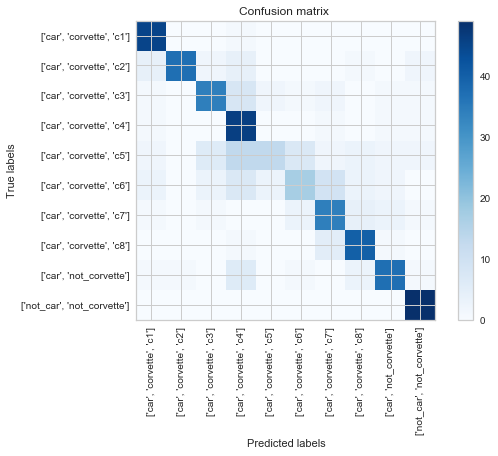

In [109]:
# plot confusion matrix with the labels
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(np.arange(10), labels, rotation='vertical')
plt.yticks(np.arange(10), labels)
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

## Perform Predictions One at a Time

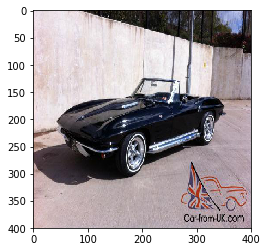

In [106]:
# view one of the images
plt.imshow(X[130])

In [107]:
# true label for index
test['classification'][130]

"['car', 'corvette', 'c2']"

In [114]:
# use the model to predict the classification
prediction = model_ResNet50.predict(np.expand_dims(X[130], axis=0))

In [115]:
# returns the probability for each class
prediction

array([[1.0205740e-02, 8.0321693e-01, 4.8496397e-03, 4.6081651e-02,
        2.3865132e-02, 1.9546334e-02, 1.6431944e-02, 4.3186735e-02,
        3.1901821e-02, 5.2032119e-06]], dtype=float32)

In [116]:
# sort so as to return the highest probability label
result = np.argsort(prediction[0])[:-2:-1]
result[0]

1

In [117]:
result = result[0]

In [118]:
# use that index to look up the true label in the truth set
true_labels_test.columns[result]

"['car', 'corvette', 'c2']"

## Iterate through Entire Test Set and Calculate Model Accuracy

In [110]:
# load the compiled model
model_Resnet50 = load_model('Resnet50_model.h5')

In [111]:
# convert the true labels dataframe into an array
y_true_labels = np.array(true_labels_test)
y_true_labels

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [112]:
# iterate through the test set and make a prediction
corvette_predictions = [np.argmax(model_ResNet50.predict(np.expand_dims(image, axis=0))) for image in X]

# compare the predictions to the true classification and calculate 
#   the total accuracy
test_accuracy = (100 * np.sum(np.array(corvette_predictions)==np.argmax(y_true_labels, axis=1))) / len(corvette_predictions)
test_accuracy

72.42798353909465